# Восстановление золота из руды

Нам нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

# Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore")

from IPython import display

Так как индексы у нас должны быть датой, применим соответствующие параметры при чтении файлов

In [2]:
df = pd.read_csv('gold_recovery_full_new.csv', parse_dates=['date'], index_col='date')

In [3]:
train = pd.read_csv('gold_recovery_train_new.csv', parse_dates=['date'], index_col='date')

In [4]:
test = pd.read_csv('gold_recovery_test_new.csv', parse_dates=['date'], index_col='date')

In [5]:
df.index

DatetimeIndex(['2016-01-15 00:00:00', '2016-01-15 01:00:00',
               '2016-01-15 02:00:00', '2016-01-15 03:00:00',
               '2016-01-15 04:00:00', '2016-01-15 05:00:00',
               '2016-01-15 06:00:00', '2016-01-15 07:00:00',
               '2016-01-15 08:00:00', '2016-01-15 09:00:00',
               ...
               '2018-08-18 01:59:59', '2018-08-18 02:59:59',
               '2018-08-18 03:59:59', '2018-08-18 04:59:59',
               '2018-08-18 05:59:59', '2018-08-18 06:59:59',
               '2018-08-18 07:59:59', '2018-08-18 08:59:59',
               '2018-08-18 09:59:59', '2018-08-18 10:59:59'],
              dtype='datetime64[ns]', name='date', length=19439, freq=None)

Тип данных у индексов datetime

In [6]:
df.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

В основном датафрейме у нас 19439 наблюдений

In [8]:
train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

В обучающей выборке 14149 наблюдений

In [10]:
test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

В тестовой выборке 5290 наблюдений.  
14149 + 5290 = 19439  
Все сходится)

Выясним, правильно ли рассчитана эффективность обогащения. Для примера возьмем столбец rougher.output.recovery из обучающей выборки

In [12]:
recovery_pred = (train['rougher.output.concentrate_au']*(train['rougher.input.feed_au'] - train['rougher.output.tail_au']))*100/(train['rougher.input.feed_au']*(train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))

In [13]:
mean_absolute_error(train['rougher.output.recovery'], recovery_pred)

1.1100347049376097e-14

Совсем незначительная ошибка. Скорее всего из-за погрешностей в вычислении Python (4/2=2,000000000000000000000000000000001)

Давайте посмотрим на столбцы, которые есть в обучающей выборке, но нет в тестовой

In [14]:
print(*[column for column in train.columns if column not in test.columns], sep='\n')

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Все колонки относятся к типам output или calculation. В реальном применении модели машинного обучения эти признаки будут недоступны, поэтому их не включили в тестовую выборку

Посмотрим на отсутствующие значения в обучающей и тестовой выборках

In [15]:
train.isna().sum().sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
final.output.tail_pb                         100
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
dtype: int64

In [16]:
test.isna().sum().sort_values(ascending=False).head(10)

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.sulfate                4
primary_cleaner.input.xanthate               4
secondary_cleaner.state.floatbank2_a_air     3
rougher.input.feed_rate                      3
dtype: int64

В обеих выборках есть пропущенные значения. Так как соседние по времени параметры похожи, заполним их ближайшими соседями. Но прежде проверим на наличие больших промежутков между наблюдениями. Если таковые есть, то этот метод будет некорректным

In [17]:
pd.Series([train.index[i+1] - train.index[i] for i in range(len(train)-1)]).value_counts()

0 days 01:00:00      13820
0 days 02:00:00        145
0 days 03:00:00         47
0 days 04:00:00         27
0 days 05:00:00         18
0 days 06:00:00         14
0 days 09:00:00          8
0 days 08:00:00          7
0 days 07:00:00          7
0 days 12:00:00          5
0 days 15:00:00          5
0 days 11:00:00          3
1 days 08:00:00          3
0 days 13:00:00          3
0 days 14:00:00          3
0 days 10:00:00          3
122 days 01:00:00        2
1 days 02:00:00          2
0 days 20:00:00          2
4 days 13:00:00          1
3 days 06:00:00          1
1 days 05:00:00          1
2 days 00:00:00          1
1 days 03:00:00          1
5 days 04:00:00          1
0 days 21:00:00          1
0 days 16:00:00          1
3 days 07:00:00          1
5 days 14:00:00          1
0 days 06:59:59          1
0 days 18:00:00          1
8 days 03:00:00          1
6 days 12:00:00          1
2 days 12:00:00          1
0 days 22:00:00          1
6 days 15:00:00          1
1 days 23:00:00          1
1

In [18]:
pd.Series([test.index[i+1] - test.index[i] for i in range(len(test)-1)]).value_counts()

0 days 01:00:00      5193
0 days 02:00:00        46
0 days 03:00:00        12
0 days 04:00:00         6
0 days 05:00:00         6
0 days 08:00:00         5
0 days 06:00:00         4
0 days 07:00:00         4
0 days 10:00:00         3
0 days 12:00:00         2
0 days 21:00:00         1
0 days 19:00:00         1
6 days 19:00:00         1
0 days 18:00:00         1
243 days 01:00:00       1
0 days 13:00:00         1
0 days 14:00:00         1
3 days 13:00:00         1
dtype: int64

Оказывается, не все промежутки составляют 1 час. Есть и периоды в 122 и 243 дней. Тогда нельзя заполнять их ближайшими соседями. Давайте заполним пропуски их ближайшими соседями только для тех наблюдений, у которых разница между следующим наблюдением меньше или равна одному дню

In [19]:
def fill_gaps(data):
    for i in range(len(data)-1):
        if data.iloc[i].isna().sum() > 0 and (data.iloc[i+1].name - data.iloc[i].name) <= pd.to_timedelta('1 days 00:00:00'):
            data.iloc[i] = data.iloc[i].fillna(method='bfill')
    return data

In [20]:
test.isna().sum().sum()

90

In [21]:
test = fill_gaps(test)

In [22]:
test.isna().sum().sum()

0

In [23]:
train.isna().sum().sum()

4100

In [24]:
train = fill_gaps(train)

In [25]:
train.isna().sum().sum()

34

В обучающей выборке еще остались пропущенные значения. Так как их немного, можно их удалить

In [26]:
train.dropna(inplace=True)

Также проверим на наличие дубликатов

In [27]:
train.duplicated().sum()

0

In [28]:
test.duplicated().sum()

0

Прекрасно!)

# Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [29]:
# Функция для отображения графика концентратов для отдельного металла на разных стадиях обработки
def plot_concentrates(metal):
    steps = ['rougher input', 'rougher output', 'primary cleaner', 'secondary cleaner']
    concentrates = [df['rougher.input.feed_' + metal].mean(), df['rougher.output.concentrate_' + metal].mean(), df['primary_cleaner.output.concentrate_' + metal].mean(), df['final.output.concentrate_' + metal].mean()]
    plt.bar(steps, concentrates)
    plt.title(metal.title() + ' concentrate')
    plt.grid()
    plt.xticks(rotation = 45)
    plt.show()

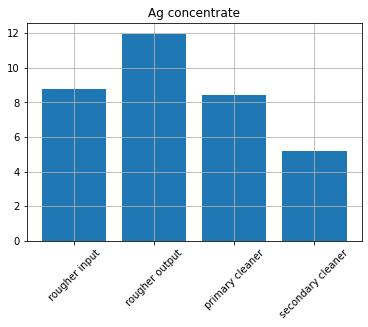

In [30]:
plot_concentrates('ag')

Концентрация серебра в начальном сырье составляет 8.5%. После флотации его концентрация увеличивается до 12%, а после двух этапов очистки понижается до 5%

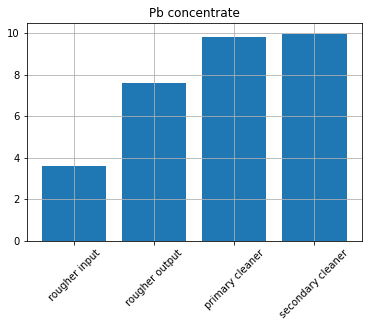

In [31]:
plot_concentrates('pb')

Концентрация свинца постепенно увеличивается. В начальном сырье составило 3.8%, а после вторичной очистки - 10%

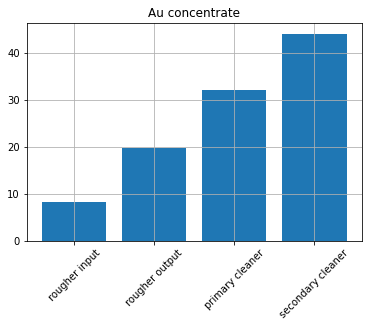

In [32]:
plot_concentrates('au')

Золота в начальном сырье составило лишь 8%. После всех этапов его концентрация увеличивается до 43%

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

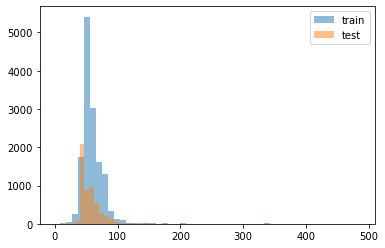

In [33]:
plt.hist(train['rougher.input.feed_size'], bins=50, alpha=0.5, label='train')
plt.hist(test['rougher.input.feed_size'], bins=50, alpha=0.5, label='test')
plt.legend(loc='upper right')
plt.show()

В принципе, распределения похожи. Распределение для тестовой выборки немного отличается от обучающей - первое сдвинуто немного в меньшую сторону. Также присутствуют сильные выбросы, которые могут помешать построению модели. Удалим их с помощью процентилей. По данным сайта https://techade.ru/stati/flotatsiya-rudy размеры большинства частиц должны лежать в оптимальном интервале 40—100 мкм.

In [34]:
max_threshold_train = train['rougher.input.feed_size'].quantile(0.99)
min_threshold_train = train['rougher.input.feed_size'].quantile(0.01)
print(min_threshold_train, max_threshold_train)

32.23834220477678 124.24636883656001


In [35]:
max_threshold_test = test['rougher.input.feed_size'].quantile(0.99)
min_threshold_test = test['rougher.input.feed_size'].quantile(0.01)
print(min_threshold_test, max_threshold_test)

38.469979740817855 111.93013945747064


In [36]:
train = train[(train['rougher.input.feed_size'] >= min_threshold_train) & (train['rougher.input.feed_size'] <= max_threshold_train)]
test = test[(test['rougher.input.feed_size'] >= min_threshold_test) & (test['rougher.input.feed_size'] <= max_threshold_test)]

In [37]:
train.shape

(13857, 86)

In [38]:
test.shape

(5184, 52)

Также построим график суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [39]:
rougher_input = pd.Series(df['rougher.input.feed_au'] + df['rougher.input.feed_ag'] + df['rougher.input.feed_pb'] + df['rougher.input.feed_sol'])
rougher_output = pd.Series(df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb'] + df['rougher.output.concentrate_sol'])
primary_cleaner = pd.Series(df['primary_cleaner.output.concentrate_au'] + df['primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_pb'] + df['primary_cleaner.output.concentrate_sol'])
secondary_cleaner = pd.Series(df['final.output.concentrate_au'] + df['final.output.concentrate_ag'] + df['final.output.concentrate_pb'] + df['final.output.concentrate_sol'])

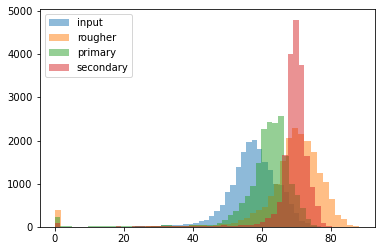

In [40]:
plt.hist(rougher_input, bins=50, label='input', alpha=0.5)
plt.hist(rougher_output, bins=50, label='rougher', alpha=0.5)
plt.hist(primary_cleaner, bins=50, label='primary', alpha=0.5)
plt.hist(secondary_cleaner, bins=50, label='secondary', alpha=0.5)
plt.legend()
plt.show()

Присутствуют нулевые аномалии в суммарных концентрациях. Отдельно по каждой руде нуль может быть. А вот нуль суммарно - это уже вряд ли. Избавимся от таких наблюдений

In [41]:
train = train.loc[[index for index in train.index if index not in rougher_input[rougher_input<1].index], :]
train = train.loc[[index for index in train.index if index not in rougher_output[rougher_output<1].index], :]
train = train.loc[[index for index in train.index if index not in primary_cleaner[primary_cleaner<1].index], :]
train = train.loc[[index for index in train.index if index not in secondary_cleaner[secondary_cleaner<1].index], :]
train.shape

(13320, 86)

In [42]:
test = test.loc[[index for index in test.index if index not in rougher_input[rougher_input<1].index], :]
test = test.loc[[index for index in test.index if index not in rougher_output[rougher_output<1].index], :]
test = test.loc[[index for index in test.index if index not in primary_cleaner[primary_cleaner<1].index], :]
test = test.loc[[index for index in test.index if index not in secondary_cleaner[secondary_cleaner<1].index], :]
test.shape

(5027, 52)

# Моделирование

Функцией потерь у нас является метрика smape. В идеале она должна быть максимально маленькой. Я буду использовать следующие алгоритмы: линейная регрессия, случайный лес, Lasso и Ridge. Для начала подготовим все функции для расчета итогового smape

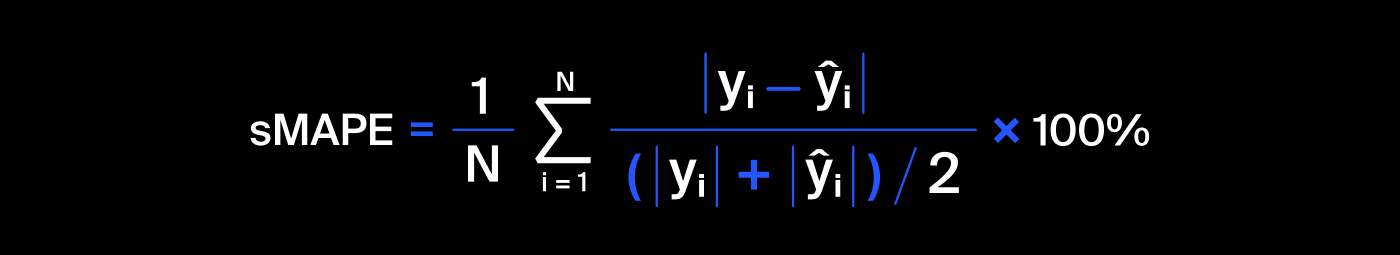

In [43]:
display.Image("smape.jpg")

In [44]:
# Функция для расчета симметричного среднего абсолютного процентного отклонения
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

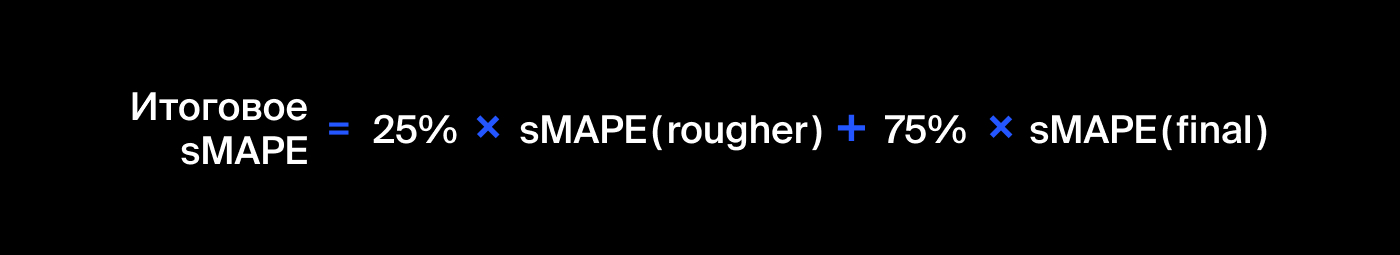

In [45]:
display.Image("_smape.jpg")

In [46]:
# Функция для расчета итогового smape
def total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [47]:
# Функция для кросс-валидации. Возвращает среднее значение smape
def cross_validation(model, X, y, cv):
    scores = []

    sample_size = int(len(X)/cv)

    count = 0

    for i in range(0, len(X), sample_size):
        if count == cv:
            break
        valid_indexes = list(range(i, i+sample_size))
        train_indexes = list(range(0, i)) + list(range(valid_indexes[-1]+1, len(X)))
        X_train = X[X.index.isin(train_indexes)]
        X_valid = X[X.index.isin(valid_indexes)]
        y_train = y[y.index.isin(train_indexes)]
        y_true = y[y.index.isin(valid_indexes)]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        score = smape(y_true, y_pred)
        scores.append(score)
        count += 1
        
    return np.mean(scores)

Нам нужно предсказать сразу два показателя - rougher.output.recovery и final.output.recovery. Тогда у нас будет 2 целевых признака. Также нужно убрать из обучающей выборки признаки, которые отсутствуют в тестовой. Плюс нужно поменять индексы типа datetime

In [48]:
X_train = train.loc[:, [column for column in train.columns if column in test.columns]].reset_index(drop=True)
y_train_rougher = train['rougher.output.recovery'].reset_index(drop=True)
y_train_final = train['final.output.recovery'].reset_index(drop=True)

Первым алгоритмом я выбрал линейную регрессию, так как она быстро обучается. Применим GridSearchCV для нахождения лучшей модели

In [49]:
smape_score = make_scorer(smape, greater_is_better=False)

In [50]:
model = LinearRegression()

parameters = {
    'copy_X': [True, False],
    'fit_intercept':[True, False],
    'n_jobs': [-1, 1, 2, 3, 4, None]
}

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring=smape_score)

grid.fit(X_train, y_train_rougher)
model_rougher = grid.best_estimator_
print(f'best model rougher params: {grid.best_params_}')
smape_train_rougher = cross_validation(model_rougher, X_train, y_train_rougher, 5)

grid.fit(X_train, y_train_final)
model_final = grid.best_estimator_
print(f'best model final params: {grid.best_params_}')
smape_train_final = cross_validation(model_final, X_train, y_train_final, 5)

total_smape(smape_train_rougher, smape_train_final)

best model rougher params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
best model final params: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}


9.779472474398393

Линейная регрессия в среднем ошибается на 9.78%

Случайный лес для различных значений глубины дерева

In [51]:
for depth in range(1, 11):
    model = RandomForestRegressor(max_depth=depth, random_state=22)
    smape_train_rougher = cross_validation(model, X_train, y_train_rougher, 5)
    smape_train_final = cross_validation(model, X_train, y_train_final, 5)
    print(depth, total_smape(smape_train_rougher, smape_train_final))

1 8.81108687580725
2 8.395418504984779
3 8.284271380825924
4 8.330649532091009
5 8.352784705360433
6 8.276537106739653
7 8.34021903213582
8 8.325380372097436
9 8.410142248434521
10 8.507748033858238


Лучший показатель у глубины дерева 3, в среднем она ошиблась на 8.27%

Алгоритм Lasso для различных значений параметра alpha

In [52]:
for alpha in range(10, 101, 10):
    model = Lasso(alpha=alpha)
    smape_train_rougher = cross_validation(model, X_train, y_train_rougher, 5)
    smape_train_final = cross_validation(model, X_train, y_train_final, 5)
    print(alpha, total_smape(smape_train_rougher, smape_train_final))

10 9.1526449039637
20 8.995674109477704
30 8.929580021626695
40 8.918811335868877
50 8.907918966665713
60 8.91665757319949
70 8.948378135047149
80 8.991809091996124
90 9.069872887375789
100 9.146621343981968


Lasso показал свой лучший результат со значением alpha 50, и он составил 8.9

Также посмотрим на алгоритм Ridge для различных значений параметра alpha

In [53]:
for alpha in range(10, 101, 10):
    model = Ridge(alpha=alpha)
    smape_train_rougher = cross_validation(model, X_train, y_train_rougher, 5)
    smape_train_final = cross_validation(model, X_train, y_train_final, 5)
    print(alpha, total_smape(smape_train_rougher, smape_train_final))

10 9.793101104544212
20 9.792230186456866
30 9.791388191783843
40 9.79056580842202
50 9.789759871610743
60 9.788975593433506
70 9.788223290852944
80 9.78748835944588
90 9.786764386431082
100 9.78605139693175


Результат не лучше, чем у линейной регрессии. Отбрасываем

Итого, лучший результат показал случайный лес с глубиной дерева 3

# Тест

Проверим нашу модель на тестовой выборке

In [54]:
X_test = test.reset_index(drop=True)
y_test_rougher = df.loc[[index for index in test.index], 'rougher.output.recovery'].reset_index(drop=True)
y_test_final = df.loc[[index for index in test.index], 'final.output.recovery'].reset_index(drop=True)

In [55]:
model = RandomForestRegressor(max_depth=3, random_state=22)
model.fit(X_train, y_train_rougher)
y_pred_rougher = model.predict(X_test)
smape_test_rougher = smape(y_test_rougher, y_pred_rougher)
model.fit(X_train, y_train_final)
y_pred_final = model.predict(X_test)
smape_test_final = smape(y_test_final, y_pred_final)
print(total_smape(smape_test_rougher, smape_test_final))

6.914031505518821


Итоговый показатель smape для тестовой выборки - 6.8. Проверим модель на адекватность - посмотрим на результат константной модели, где в предикте будет медианное значение

In [56]:
y_train_rougher_median = pd.Series(y_train_rougher.median(), y_test_rougher.index)
y_train_final_median = pd.Series(y_train_final.median(), y_test_final.index)
smape_test_rougher = smape(y_test_rougher, y_train_rougher_median)
smape_test_final = smape(y_test_final, y_train_final_median)
total_smape(smape_test_rougher, smape_test_final)

7.262280157556283

Наша модель прошла тест на адекватность!)

# Вывод

Золото, чтобы стать золотом, проходит несколько этапов обработки. Из сырья с большим количеством примесей до 99.9 процентного содержания золота, оно сначала дробится до состояния песка, затем проходит этап под названием флотация и несколько этапов очистки. Все это делается в специальных промешленных предприятиях. Мы исследовали данные компании Цифра, которая разрабатывает решения для эффективной работы таких предприятий.   
Сначала мы подготовили данные: прочитали данные, проверили правильно ли рассчитана эффективность обогащения, избавились от пропущенных значений; провели анализ данных: посмотрели, как меняется концентрация металлов на различных этапах очистки, сравнили распределения размеров гранул сырья на обучающей и тестовой выборках, исследовали суммарную концентрацию всех веществ на разных стадиях; и в конце подготовили прототип модели машинного обучения: написали функцию для вычисления итоговой sMAPE, обучили разные модели и оцените их качество кросс-валидацией.  
В итоге лучший результат показал случайный лес с глубиной 3. Показатель smape на тестовой выборке составил 6.8%